In [1]:
import drnb.embed.pipeline as pl

/home/james/dev/drnb-plugin/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Uniform Manifold Approximation with Two-phase Optimization (UMATO: [arxiv](https://arxiv.org/abs/2205.00420), [github](https://github.com/hyungkwonko/umato)) is a UMAP like method that lays out data in three stages: first, hubs (points with lots of neighbors) are laid out, then non-hubs, then outliers, with slightly different treatment of each, the idea being that the hubs represent the global layout of the data the best, while outliers tend to distort the layout. The authors claim that this gives better global preservation across multiple datasets.

Parameters you might want to play with:

* `n_neighbors=50`: larger than the default `15` with UMAP. 
* `hub_num=300`: the number of items in the dataset which are part of the global embedding.
* `global_n_epochs=None` (defaults to 100): number of epochs for the global hub embedding.
* `local_n_epochs=None` (defaults to 50): number of epochs for the local (non-hub but not outlier) embedding.
* `global_learning_rate=0.0065`: learning rate for the global embedding stage.
* `local_learning_rate=0.01`: learning rate for the local embedding stage.
* `gamma=0.1` This exists in the UMAP code base (in the API as `repulsion_strength`) but is rarely changed from its default value of 1 (which is like not using it). `gamma` is used in the UMATO code in a similar way. It is smaller than the default UMAP value (also to reduce the effect of hub interactions in the non-hub layout code), but the learning rates are even more reduced so it's not entirely clear to me what the overall effect would be.
* `init="pca"`. PCA initialization. Or: 
    * `"random"` (Gaussian with standard deviation 0.05)
    * `"spectral"` (the [sklearn SpectralEmbedding](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html) method)
    * or user-defined coordinates (although non-hub coordinates are ignored). 
    
    In the PCA, random and user-defined case, the coordinates are normalized to 0-1 by dividing by the largest value (so in the `"random"` case this changes the standard deviation to closer to 0.19).


[14:38:12] INFO     Getting dataset s1k                                              ]8;id=392107;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=905432;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#246\246]8;;\

           INFO     Embedding                                                        ]8;id=74695;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=761983;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#249\249]8;;\

[14:38:13] INFO     [external:umato-plugin] launching: /home/james/.local/bin/uv run ]8;id=771115;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=710981;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#145\145]8;;\
                    --color never --quiet drnb-plugin-run.py --method umato-plugin                  
                    --request /tmp/drnb-umato-plugin-_rd3ri6c/request.json                          

[14:38:15] INFO     Running UMATO with params={'verbose': True}                      ]8;id=564374;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=764325;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     UMATO(a=np.float64(1.57694346046584),                            ]8;id=396681;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=389415;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\
                    b=np.float64(0.8950608779639974),                                               

           INFO           verbose=True)                                              ]8;id=333460;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=904777;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     Sat Nov 15 14:38:15 2025 Construct fuzzy simplicial set          ]8;id=238827;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=22898;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     Sat Nov 15 14:38:15 2025 Finding Nearest Neighbors               ]8;id=942912;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=383263;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     Sat Nov 15 14:38:15 2025 Building RP forest with 7 trees         ]8;id=110290;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=564901;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

[14:38:16] INFO     Sat Nov 15 14:38:16 2025 NN descent for 10 iterations            ]8;id=531515;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=590194;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

[14:38:23] INFO              0  /  10                                                ]8;id=996947;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=737317;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO              1  /  10                                                ]8;id=254902;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=849423;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO              2  /  10                                                ]8;id=365783;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=742449;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     Sat Nov 15 14:38:23 2025 Finished Nearest Neighbor Search        ]8;id=661262;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=968759;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     Sat Nov 15 14:38:23 2025 Build K-nearest neighbor graph          ]8;id=227932;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=217555;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\
                    structure                                                                       

[14:38:27] INFO     Sat Nov 15 14:38:27 2025 Run global optimization                 ]8;id=868502;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=162273;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

[14:38:28] INFO     [INFO] Current loss: 0.603543, @ iteration: 1/100                ]8;id=600874;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=574799;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

[14:38:29] INFO     [INFO] Current loss: 0.963805, @ iteration: 2/100                ]8;id=266567;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=983843;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.725502, @ iteration: 3/100                ]8;id=887557;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=771518;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.716907, @ iteration: 4/100                ]8;id=914506;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=654455;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.711992, @ iteration: 5/100                ]8;id=316545;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=502669;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715548, @ iteration: 6/100                ]8;id=612420;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=919839;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.713615, @ iteration: 7/100                ]8;id=86767;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=421053;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715437, @ iteration: 8/100                ]8;id=25100;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=24305;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.714717, @ iteration: 9/100                ]8;id=899960;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=577943;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715523, @ iteration: 10/100               ]8;id=684827;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=74051;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715258, @ iteration: 11/100               ]8;id=857590;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=658689;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715601, @ iteration: 12/100               ]8;id=219118;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=356608;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715496, @ iteration: 13/100               ]8;id=887237;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=696915;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715663, @ iteration: 14/100               ]8;id=727016;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=667717;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715646, @ iteration: 15/100               ]8;id=252581;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=905530;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715748, @ iteration: 16/100               ]8;id=630126;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=46533;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715766, @ iteration: 17/100               ]8;id=171792;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=343149;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715828, @ iteration: 18/100               ]8;id=74688;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=188159;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715848, @ iteration: 19/100               ]8;id=212110;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=173556;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715883, @ iteration: 20/100               ]8;id=648533;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=369845;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715893, @ iteration: 21/100               ]8;id=117019;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=386288;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715902, @ iteration: 22/100               ]8;id=461161;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=284481;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715907, @ iteration: 23/100               ]8;id=853647;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=97409;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715919, @ iteration: 24/100               ]8;id=250543;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=440695;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715933, @ iteration: 25/100               ]8;id=439146;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=572619;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715953, @ iteration: 26/100               ]8;id=43259;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=266395;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715944, @ iteration: 27/100               ]8;id=991991;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=538978;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715926, @ iteration: 28/100               ]8;id=255001;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=651028;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715913, @ iteration: 29/100               ]8;id=907155;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=707617;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715905, @ iteration: 30/100               ]8;id=383806;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=788324;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715895, @ iteration: 31/100               ]8;id=146699;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=493418;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715886, @ iteration: 32/100               ]8;id=633957;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=792054;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715875, @ iteration: 33/100               ]8;id=852802;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=193853;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715843, @ iteration: 34/100               ]8;id=928205;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=150680;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715820, @ iteration: 35/100               ]8;id=367431;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=763213;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715808, @ iteration: 36/100               ]8;id=506534;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=693877;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715806, @ iteration: 37/100               ]8;id=804119;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=208942;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715810, @ iteration: 38/100               ]8;id=57266;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=914804;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715794, @ iteration: 39/100               ]8;id=959432;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=709869;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715769, @ iteration: 40/100               ]8;id=958306;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=583498;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715758, @ iteration: 41/100               ]8;id=208715;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=540438;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715751, @ iteration: 42/100               ]8;id=940957;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=587751;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715753, @ iteration: 43/100               ]8;id=393021;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=274029;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715761, @ iteration: 44/100               ]8;id=741299;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=123789;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715773, @ iteration: 45/100               ]8;id=343954;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=13805;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715784, @ iteration: 46/100               ]8;id=68367;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=799722;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715793, @ iteration: 47/100               ]8;id=377656;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=949665;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715803, @ iteration: 48/100               ]8;id=215326;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=726208;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715815, @ iteration: 49/100               ]8;id=695611;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=500026;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715832, @ iteration: 50/100               ]8;id=29470;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=922160;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715853, @ iteration: 51/100               ]8;id=536443;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=783744;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715868, @ iteration: 52/100               ]8;id=122220;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=534988;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715877, @ iteration: 53/100               ]8;id=582648;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=729494;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715886, @ iteration: 54/100               ]8;id=638968;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=434395;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715892, @ iteration: 55/100               ]8;id=123401;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=760731;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

[14:38:30] INFO     [INFO] Current loss: 0.715897, @ iteration: 56/100               ]8;id=728247;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=809011;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715901, @ iteration: 57/100               ]8;id=109621;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=931574;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715902, @ iteration: 58/100               ]8;id=292749;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=879375;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715901, @ iteration: 59/100               ]8;id=73363;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=14593;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715902, @ iteration: 60/100               ]8;id=276451;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=394206;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715905, @ iteration: 61/100               ]8;id=491603;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=889250;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715910, @ iteration: 62/100               ]8;id=918500;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=230646;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715911, @ iteration: 63/100               ]8;id=884984;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=561531;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715910, @ iteration: 64/100               ]8;id=187407;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=93638;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715909, @ iteration: 65/100               ]8;id=875260;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=620042;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715917, @ iteration: 66/100               ]8;id=117088;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=494255;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715902, @ iteration: 67/100               ]8;id=6383;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=61850;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715882, @ iteration: 68/100               ]8;id=732587;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=496839;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715871, @ iteration: 69/100               ]8;id=753111;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=573027;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715868, @ iteration: 70/100               ]8;id=210871;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=633087;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715867, @ iteration: 71/100               ]8;id=86069;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=180927;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715865, @ iteration: 72/100               ]8;id=7984;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=437075;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715866, @ iteration: 73/100               ]8;id=17870;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=113766;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715855, @ iteration: 74/100               ]8;id=663138;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=506055;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715855, @ iteration: 75/100               ]8;id=754465;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=264042;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715866, @ iteration: 76/100               ]8;id=706496;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=939302;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715870, @ iteration: 77/100               ]8;id=398004;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=737369;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715859, @ iteration: 78/100               ]8;id=37178;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=97492;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715844, @ iteration: 79/100               ]8;id=912730;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=95714;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715831, @ iteration: 80/100               ]8;id=462918;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=879910;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715822, @ iteration: 81/100               ]8;id=936417;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=453319;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715813, @ iteration: 82/100               ]8;id=513213;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=265934;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715804, @ iteration: 83/100               ]8;id=673411;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=21922;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715796, @ iteration: 84/100               ]8;id=679893;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=956963;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715788, @ iteration: 85/100               ]8;id=769391;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=858320;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715781, @ iteration: 86/100               ]8;id=278394;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=506367;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715774, @ iteration: 87/100               ]8;id=216553;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=568228;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715768, @ iteration: 88/100               ]8;id=642464;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=583384;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715762, @ iteration: 89/100               ]8;id=61607;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=673025;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715757, @ iteration: 90/100               ]8;id=759121;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=663807;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715753, @ iteration: 91/100               ]8;id=94028;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=705145;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715749, @ iteration: 92/100               ]8;id=437395;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=595651;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715745, @ iteration: 93/100               ]8;id=670611;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=748458;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715742, @ iteration: 94/100               ]8;id=186903;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=311552;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715739, @ iteration: 95/100               ]8;id=735622;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=7961;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715736, @ iteration: 96/100               ]8;id=305640;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=989385;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715733, @ iteration: 97/100               ]8;id=971248;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=473215;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715731, @ iteration: 98/100               ]8;id=655736;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=933997;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     [INFO] Current loss: 0.715728, @ iteration: 99/100               ]8;id=219835;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=956042;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

[14:38:31] INFO     [INFO] Current loss: 0.715725, @ iteration: 100/100              ]8;id=216038;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=384744;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     Sat Nov 15 14:38:31 2025 Get NN indices & Initialize them using  ]8;id=227950;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=612677;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\
                    original hub information                                                        

[14:38:40] INFO     Sat Nov 15 14:38:40 2025 Run local optimization                  ]8;id=445434;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=698968;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

[14:38:41] INFO     Sat Nov 15 14:38:41 2025 Embedding outliers                      ]8;id=630984;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=914734;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

[14:38:45] INFO     Sat Nov 15 14:38:45 2025 Finished embedding                      ]8;id=84936;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=504240;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     Saving results to /tmp/drnb-umato-plugin-_rd3ri6c/result.npz     ]8;id=147651;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=542436;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     Evaluating                                                       ]8;id=448032;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=434463;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#271\271]8;;\

           INFO     rte-5-euclidean                                                       ]8;id=806241;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py\base.py]8;;\:]8;id=660360;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=126484;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=968363;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.npy                  ]8;id=463987;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=374816;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=954827;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=893037;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=820264;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=786664;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

[14:38:46] INFO     rpc-5-euclidean                                                       ]8;id=467513;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py\base.py]8;;\:]8;id=390554;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=421060;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=566782;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.npy                  ]8;id=641823;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=720463;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=236655;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=162600;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=861191;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=538994;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

           INFO     nnp-[15, 50, 150]-noself-euclidean                                    ]8;id=721257;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py\base.py]8;;\:]8;id=766091;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py#61\61]8;;\

[14:38:47] INFO     Plotting                                                         ]8;id=384085;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=326330;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#281\281]8;;\

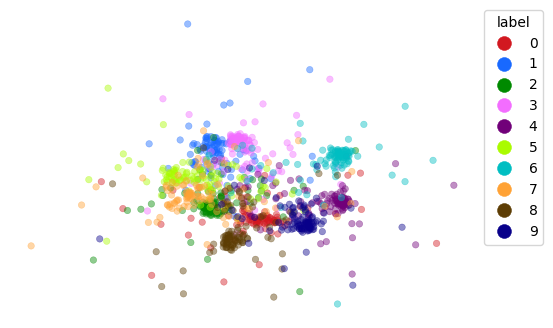

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.6346000000000002), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.42109817), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.19433333333333333), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.33348), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.4171333333333333), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [2]:
pl.standard_eval(
    method="umato-plugin",
    params=dict(verbose=True),
    dataset="s1k",
    verbose=True,
)

           INFO     Getting dataset mnist                                            ]8;id=515348;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=45753;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#246\246]8;;\

[14:38:49] INFO     Embedding                                                        ]8;id=897595;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=782947;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#249\249]8;;\

           INFO     [external:umato-plugin] launching: /home/james/.local/bin/uv run ]8;id=127002;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=648284;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#145\145]8;;\
                    --color never --quiet drnb-plugin-run.py --method umato-plugin                  
                    --request /tmp/drnb-umato-plugin-9s0mj24b/request.json                          

[14:38:51] INFO     Running UMATO with params={}                                     ]8;id=254910;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=208201;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

[14:42:21] INFO     Saving results to /tmp/drnb-umato-plugin-9s0mj24b/result.npz     ]8;id=628026;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=612778;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#278\278]8;;\

           INFO     Evaluating                                                       ]8;id=352532;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=168724;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#271\271]8;;\

           INFO     rte-5-euclidean                                                       ]8;id=997185;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py\base.py]8;;\:]8;id=917129;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=657055;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=803186;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/mnist.5.1337.idx.npy                ]8;id=891469;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=853887;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=624056;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=113294;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=598403;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=896187;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

           INFO     rpc-5-euclidean                                                       ]8;id=278459;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py\base.py]8;;\:]8;id=440228;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=47686;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=49086;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/mnist.5.1337.idx.npy                ]8;id=913878;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=582896;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=771921;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=413674;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=720149;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=45674;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

[14:42:22] INFO     nnp-[15, 50, 150]-noself-euclidean                                    ]8;id=677924;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py\base.py]8;;\:]8;id=874687;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py#61\61]8;;\

[14:42:27] INFO     Plotting                                                         ]8;id=912930;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=907430;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#281\281]8;;\

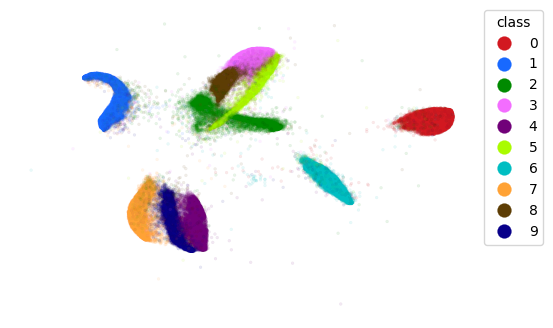

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.6365314285714286), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.41600543), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.06422380952380952), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.12925542857142858), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.21391257142857142), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [3]:
pl.standard_eval(
    method="umato-plugin",
    dataset="mnist",
    verbose=True,
)

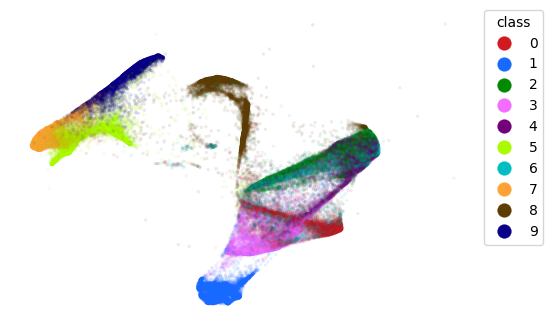

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.7699), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.67685217), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.07319523809523809), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.14118942857142858), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.22899914285714287), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [4]:
pl.standard_eval(method="umato-plugin", dataset="fashion")

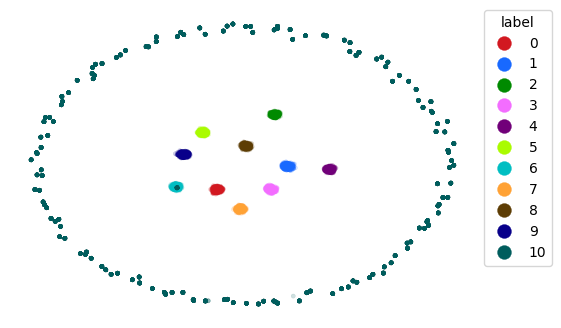

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.6927200000000001), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.68611425), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.037693333333333336), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.07840000000000001), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.17311666666666667), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [9]:
pl.standard_eval(method="umato-plugin", dataset="spheres")